In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#pd.set_option('html', True)
#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 25)

In [76]:
df = pd.read_csv("../data/Happiness Index/refugee_monthly.csv")
dfHP15 = pd.read_csv("../data/Happiness Index/2015.csv")
df['Value'].astype(str).astype(int)
dfHP15.sort(['Happiness Score'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [77]:
df = df.loc[df['Year'] == 2015]
df15Merged = df.merge(dfHP15, left_on = 'Country / territory of asylum/residence', right_on = 'Country', how ='inner')
df15Merged.head(3)

,Country / territory of asylum/residence,Origin,Year,Month,Value,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Greece,Georgia,2015,January,12,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0,1.80101
1,Greece,Georgia,2015,February,15,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0,1.80101
2,Greece,Georgia,2015,March,14,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0,1.80101


In [78]:
df_grouped = df15Merged.groupby(['Country / territory of asylum/residence','Year']).agg({'Value':'sum','Happiness Score':'mean','Economy (GDP per Capita)':'mean','Family':'mean','Health (Life Expectancy)':'mean','Freedom':'mean','Trust (Government Corruption)':'mean'})
df_grouped.sort(['Value'],ascending = 0).head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,,Family,Freedom,Happiness Score,Trust (Government Corruption),Health (Life Expectancy),Value,Economy (GDP per Capita)
Country / territory of asylum/residence,Year,,,,,,,
Germany,2015,1.29937,0.61477,6.750,0.21843,0.89186,507323,1.32792
Hungary,2015,1.20215,0.32112,4.800,0.02758,0.75905,326008,1.12094
Sweden,2015,1.28907,0.65980,7.364,0.43844,0.91087,312918,1.33171
Turkey,2015,0.94632,0.22815,5.332,0.15746,0.73172,267170,1.06098
Italy,2015,1.19777,0.26236,5.948,0.02901,0.95446,166486,1.25114
Austria,2015,1.29704,0.62433,7.200,0.18676,0.89042,92375,1.33723
Netherlands,2015,1.28017,0.61576,7.378,0.31814,0.89284,86198,1.32944
France,2015,1.26038,0.55011,6.575,0.20646,0.94579,79707,1.27778
Switzerland,2015,1.34951,0.66557,7.587,0.41978,0.94143,76246,1.39651


In [79]:
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={'Country / territory of asylum/residence': 'Country'})
df_grouped

,Country,Year,Family,Freedom,Happiness Score,Trust (Government Corruption),Health (Life Expectancy),Value,Economy (GDP per Capita)
0,Albania,2015,0.80434,0.35733,4.959,0.06413,0.81325,586,0.87867
1,Australia,2015,1.30923,0.65124,7.284,0.35637,0.93156,12397,1.33358
2,Austria,2015,1.29704,0.62433,7.200,0.18676,0.89042,92375,1.33723
3,Belgium,2015,1.28566,0.58450,6.937,0.22540,0.89667,40325,1.30782
4,Bosnia and Herzegovina,2015,0.91916,0.09245,4.949,0.00227,0.79081,49,0.83223
5,Bulgaria,2015,1.10614,0.30587,4.218,0.00872,0.76649,20163,1.01216
6,Canada,2015,1.32261,0.63297,7.427,0.32957,0.90563,16131,1.32629
7,Croatia,2015,0.79624,0.25883,5.759,0.02430,0.78805,422,1.08254
8,Cyprus,2015,0.89318,0.40672,5.689,0.06146,0.92356,2112,1.20813
9,Denmark,2015,1.36058,0.64938,7.527,0.48357,0.87464,21427,1.32548


In [80]:
dfGermany = df_grouped[(df_grouped['Country']=='Germany')]
df_grouped[(df_grouped['Country']=='Germany')]

,Country,Year,Family,Freedom,Happiness Score,Trust (Government Corruption),Health (Life Expectancy),Value,Economy (GDP per Capita)
13,Germany,2015,1.29937,0.61477,6.75,0.21843,0.89186,507323,1.32792


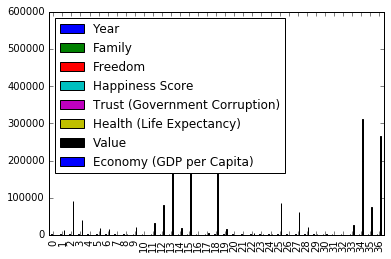

In [81]:
df_grouped.plot(kind = 'bar')

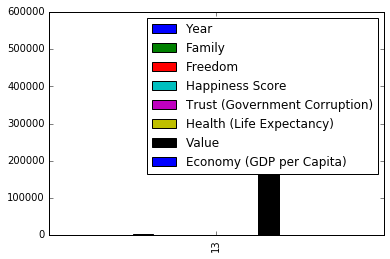

In [82]:
dfGermany.plot(kind = 'bar')

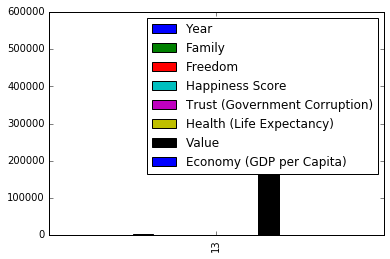

In [83]:
ax = dfGermany.plot(kind = 'bar')

In [97]:
del dfGermany['Value']
del dfGermany['Year']
del dfGermany['Happiness Score']

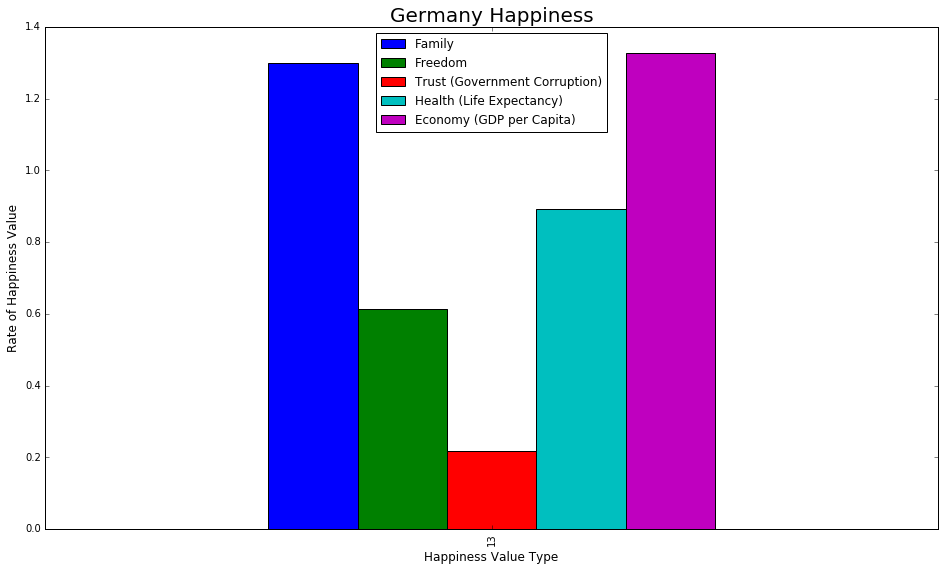

In [107]:
ax = dfGermany.plot(kind = 'bar',title = "Germany Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=12)
ax.set_ylabel("Rate of Happiness Value", fontsize=12)
ax.set_title("Germany Happiness", fontsize=20)